# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [3]:
data['ItemType'].fillna('', inplace=True)

In [4]:
data['Supplier'].fillna('', inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             128355 non-null  int64  
 1   Month            128355 non-null  int64  
 2   Supplier         128355 non-null  object 
 3   ItemCode         128355 non-null  object 
 4   Description      128355 non-null  object 
 5   ItemType         128355 non-null  object 
 6   RetailSales      128355 non-null  float64
 7   RetailTransfers  128355 non-null  float64
 8   WarehouseSales   128355 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.8+ MB


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [6]:
data[data['WarehouseSales'] < 0]

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
5554,2017,5,HEAVEN HILL DISTILLERIES INC,11449,DEEP EDDY RUBY RED GRAPEFRUIT VODKA - 50ML,LIQUOR,8.88,8.0,-1.0
5814,2017,5,LEGENDS LTD,12488,SOUTHERN TIER 3 CITRUS PEEL OUT - 6/4 12.OZ,BEER,0.00,0.0,-1.0
6063,2017,5,CONSTANTINE WINES INC,150665,AXIOS CAB 6/CS - 750ML,WINE,0.00,0.0,-1.0
7255,2017,5,GROTH VINEYARDS & WINERY,24953,GROTH CAB - 750ML,WINE,0.90,1.0,-1.0
7412,2017,5,SIERRA NEVADA BREWING CO,26144,SIERRA NEVADA SUMMERFEST 4/6 CANS - 12OZ,BEER,0.00,0.0,-45.0
...,...,...,...,...,...,...,...,...,...
127488,2018,2,SAZERAC CO,84691,DI PADRINO DRY VERMOUTH - 750ML,WINE,1.53,1.0,-1.0
128141,2018,2,BOSTON BEER CORPORATION,95389,SAM ADAMS WINTERLAGER 1/2K,KEGS,0.00,0.0,-1.0
128164,2018,2,BOSTON BEER CORPORATION,95907,SAM ADAMS SUMMER ALE 1/6K,KEGS,0.00,0.0,-1.0
128353,2018,2,,BC,BEER CREDIT,REF,0.00,0.0,-35.0


In [7]:
total_sales = data.groupby('ItemType').agg({'RetailSales': 'sum',
                                            'RetailTransfers': 'sum',
                                            'WarehouseSales': 'sum'})
total_sales

,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,
,0.00,0.00,1.00
BEER,209763.11,234924.44,2437617.32
DUNNAGE,0.00,0.00,-45331.00
KEGS,0.00,0.00,43558.00
LIQUOR,309847.85,334176.41,33173.32
NON-ALCOHOL,8109.97,9058.37,8656.72
REF,281.34,171.92,-6754.00
STR_SUPPLIES,995.98,3594.70,0.00
WINE,313400.42,340710.51,433009.47


In [8]:
total_sales = total_sales.iloc[1:,].reset_index()
total_sales

,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,BEER,209763.11,234924.44,2437617.32
1,DUNNAGE,0.00,0.00,-45331.00
2,KEGS,0.00,0.00,43558.00
3,LIQUOR,309847.85,334176.41,33173.32
4,NON-ALCOHOL,8109.97,9058.37,8656.72
5,REF,281.34,171.92,-6754.00
6,STR_SUPPLIES,995.98,3594.70,0.00
7,WINE,313400.42,340710.51,433009.47


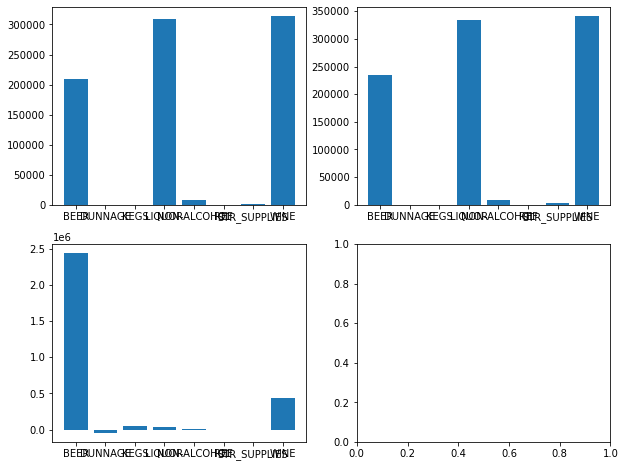

In [9]:
x = total_sales['ItemType']
y_retailsales = total_sales['RetailSales']
y_retailtrans = total_sales['RetailTransfers']
y_warehouse = total_sales['WarehouseSales']


fig, ax = plt.subplots(2,2, figsize=(10,8))

ax[0, 0].bar(x, y_retailsales)
#plt.xticks(rotation=90)
ax[0, 1].bar(x, y_retailtrans)

ax[1, 0].bar(x, y_warehouse)

fig.show()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [10]:
supp_sales = data.groupby('Supplier').agg({'RetailSales': 'sum',
                                            'RetailTransfers': 'sum',
                                            'WarehouseSales': 'sum'})
supp_sales

,RetailSales,RetailTransfers,WarehouseSales
Supplier,,,
,0.00,0.00,-6810.00
8 VINI INC,2.78,2.00,1.00
A HARDY USA LTD,0.40,0.00,0.00
A I G WINE & SPIRITS,12.52,5.92,134.00
A VINTNERS SELECTIONS,8640.57,8361.10,29776.67
...,...,...,...
WINEBOW INC,1.24,-1.58,0.00
YOUNG WON TRADING INC,1058.65,1047.40,2528.90
YUENGLING BREWERY,9628.35,10851.17,53805.32


In [11]:
supp_sales = supp_sales.iloc[1:,].reset_index()
supp_sales

,Supplier,RetailSales,RetailTransfers,WarehouseSales
0,8 VINI INC,2.78,2.00,1.00
1,A HARDY USA LTD,0.40,0.00,0.00
2,A I G WINE & SPIRITS,12.52,5.92,134.00
3,A VINTNERS SELECTIONS,8640.57,8361.10,29776.67
4,A&E INC,11.52,2.00,0.00
...,...,...,...,...
328,WINEBOW INC,1.24,-1.58,0.00
329,YOUNG WON TRADING INC,1058.65,1047.40,2528.90
330,YUENGLING BREWERY,9628.35,10851.17,53805.32
331,Z WINE GALLERY IMPORTS LLC,8.83,11.25,16.00


In [12]:
supp_sales['MixSales'] = supp_sales['RetailSales'] + supp_sales['RetailTransfers'] + supp_sales['WarehouseSales']

In [13]:
top_10_supp = supp_sales.nlargest(10, 'MixSales')
top_10_supp

,Supplier,RetailSales,RetailTransfers,WarehouseSales,MixSales
184,MILLER BREWING COMPANY,35022.63,39176.67,572623.41,646822.71
69,CROWN IMPORTS,26707.83,29561.67,579824.70,636094.20
15,ANHEUSER BUSCH INC,42559.14,47322.64,493856.19,583737.97
139,HEINEKEN USA,20923.17,23004.25,318812.59,362740.01
94,E & J GALLO WINERY,67455.63,75129.83,75594.99,218180.45
78,DIAGEO NORTH AMERICA INC,57656.36,62968.12,54252.88,174877.36
65,CONSTELLATION BRANDS,54472.51,60542.10,44968.76,159983.37
150,JIM BEAM BRANDS CO,39156.79,43020.59,2928.45,85105.83
288,THE WINE GROUP,25758.15,28462.05,26603.78,80823.98
38,BOSTON BEER CORPORATION,10773.25,11869.96,53420.91,76064.12


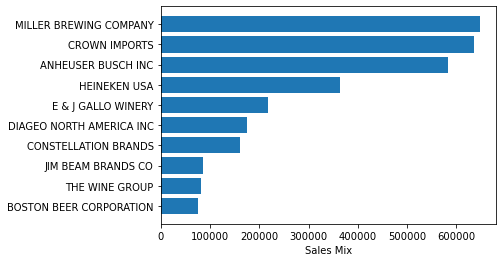

In [14]:
x = top_10_supp['Supplier']
y = top_10_supp['MixSales']

plt.barh(x, y)
plt.xlabel('Sales Mix')
plt.gca().invert_yaxis()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [15]:
monthly_sales = data.groupby('Month', as_index=False).agg({'RetailSales': 'mean',
                                            'RetailTransfers': 'mean',
                                            'WarehouseSales': 'mean'})
monthly_sales

,Month,RetailSales,RetailTransfers,WarehouseSales
0,1,5.679413,5.574833,19.072137
1,2,5.939247,6.050136,20.229658
2,4,0.000000,15.707503,0.000000
3,5,7.038838,7.421817,27.310548
4,6,7.143914,6.950396,27.839069
5,8,6.409991,6.584726,28.122641
6,9,6.757254,6.419721,22.817909
7,10,6.549021,6.827827,22.289367
8,11,6.765496,7.103699,23.348862
9,12,9.078241,8.353759,21.169463


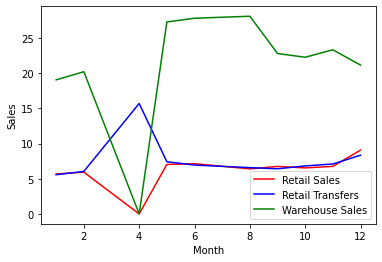

In [16]:
x = monthly_sales['Month']
y_retailsales = monthly_sales['RetailSales']
y_retailtrans = monthly_sales['RetailTransfers']
y_warehouse = monthly_sales['WarehouseSales']

plt.plot(x, y_retailsales, c='r', label='Retail Sales')
plt.plot(x, y_retailtrans, c='b', label='Retail Transfers')
plt.plot(x, y_warehouse, c='g', label='Warehouse Sales')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.legend()
plt.show()

## 4. Plot the same information as above but as a bar chart.

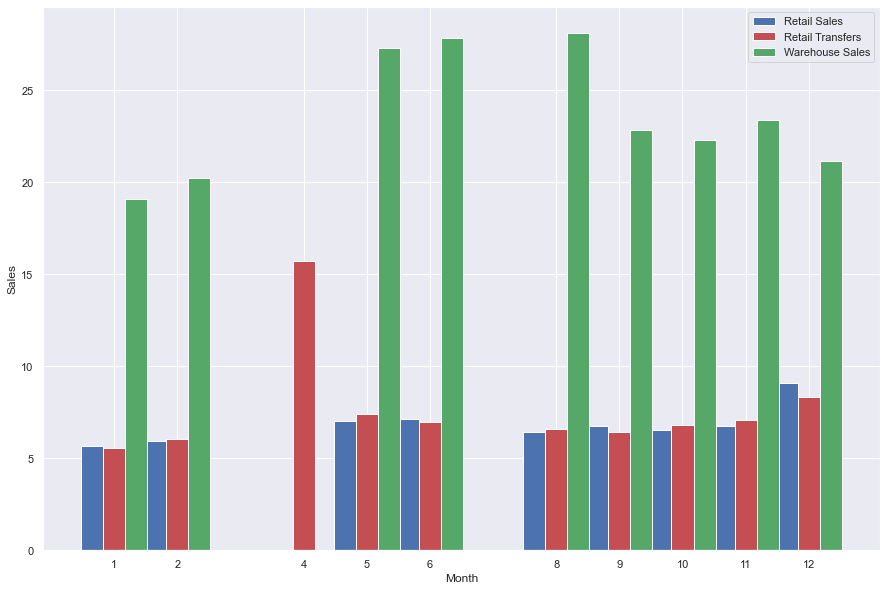

In [17]:
sns.set()
ancho_barras = 0.35
fig, ax = plt.subplots(figsize=(15, 10))

var1 = ax.bar(x, y_retailsales, label='Retail Sales', width=ancho_barras, color='b')
var2 = ax.bar(x+ancho_barras, y_retailtrans, width=ancho_barras, label='Retail Transfers',color='r')
var3 = ax.bar(x+(ancho_barras*2), y_warehouse, width=ancho_barras, label='Warehouse Sales',color='g')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(x + ancho_barras, x)
#plt.xticks(range(0,12),['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.legend(loc='best')
plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [18]:
retail_year_month = data.groupby(['Year', 'Month', 'ItemType'], as_index=False).agg({'RetailSales': 'sum'})
retail_year_month

,Year,Month,ItemType,RetailSales
0,2017,4,BEER,0.00
1,2017,4,LIQUOR,0.00
2,2017,4,NON-ALCOHOL,0.00
3,2017,4,REF,0.00
4,2017,4,STR_SUPPLIES,0.00
...,...,...,...,...
69,2018,2,LIQUOR,28852.31
70,2018,2,NON-ALCOHOL,812.84
71,2018,2,REF,41.52
72,2018,2,STR_SUPPLIES,47.76


In [19]:
year_2017 = retail_year_month[retail_year_month['Year'] == 2017]
year_2017

,Year,Month,ItemType,RetailSales
0,2017,4,BEER,0.00
1,2017,4,LIQUOR,0.00
2,2017,4,NON-ALCOHOL,0.00
3,2017,4,REF,0.00
4,2017,4,STR_SUPPLIES,0.00
5,2017,4,WINE,0.00
6,2017,5,BEER,25023.24
7,2017,5,LIQUOR,35123.36
8,2017,5,WINE,34546.89
9,2017,6,BEER,27863.26


In [20]:
year_2018 = retail_year_month[retail_year_month['Year'] == 2018]
year_2018

,Year,Month,ItemType,RetailSales
58,2018,1,BEER,16606.33
59,2018,1,DUNNAGE,0.00
60,2018,1,KEGS,0.00
61,2018,1,LIQUOR,28579.87
62,2018,1,NON-ALCOHOL,732.25
63,2018,1,REF,23.66
64,2018,1,STR_SUPPLIES,56.94
65,2018,1,WINE,29792.72
66,2018,2,BEER,18640.31
67,2018,2,DUNNAGE,0.00


Text(0.5, 1.0, 'Ventas del año 2017 por artículo')

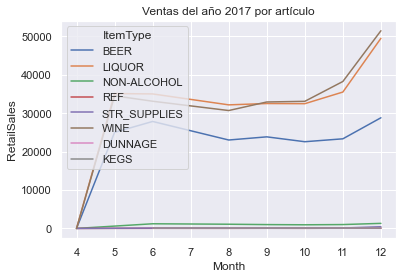

In [21]:
x_2017 = year_2017['Month']
y_2017 = year_2017['RetailSales']


sns.lineplot(x_2017, y_2017, hue=year_2017['ItemType']).set_title('Ventas del año 2017 por artículo')

Text(0.5, 1.0, 'Ventas del año 2018 por artículo')

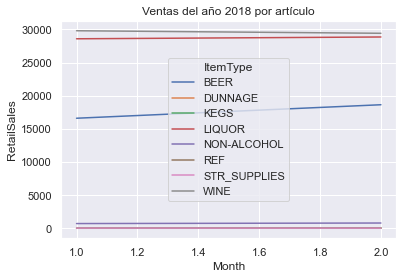

In [22]:
x_2018 = year_2018['Month']
y_2018 = year_2018['RetailSales']


sns.lineplot(x_2018, y_2018, hue=year_2018['ItemType']).set_title('Ventas del año 2018 por artículo')

## 6. Plot the same information as above but as a bar chart.

Text(0.5, 1.0, 'Ventas del año 2017 por artículo')

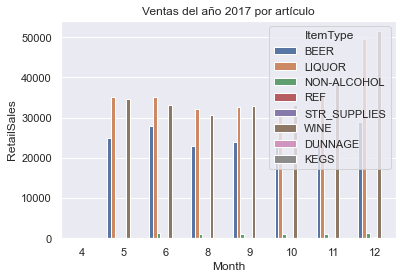

In [23]:
sns.barplot(x_2017, y_2017, hue=year_2017['ItemType']).set_title('Ventas del año 2017 por artículo')

Text(0.5, 1.0, 'Ventas del año 2018 por artículo')

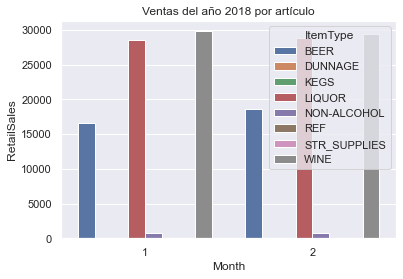

In [24]:
sns.barplot(x_2018, y_2018, hue=year_2018['ItemType']).set_title('Ventas del año 2018 por artículo')

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

<AxesSubplot:xlabel='RetailSales', ylabel='RetailTransfers'>

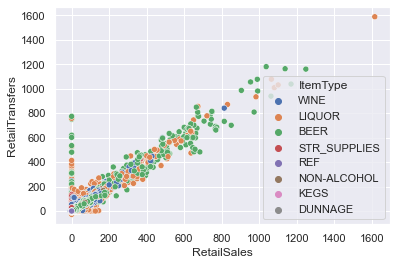

In [25]:
sns.scatterplot(data['RetailSales'], data['RetailTransfers'], hue=data['ItemType'])

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [26]:
data_numeric = data

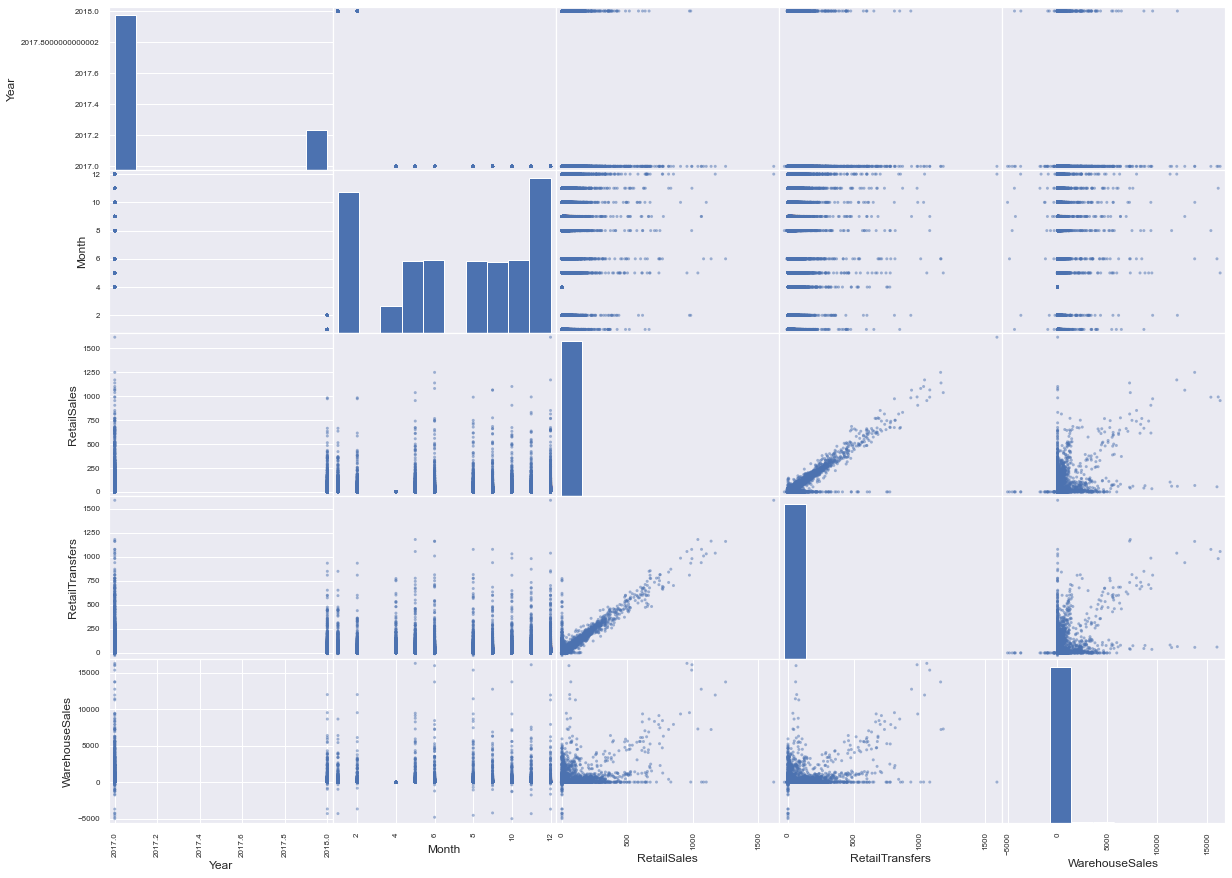

In [27]:
sns.set(context='notebook', style='darkgrid', rc={'figure.figsize': (20, 15)})

pd.plotting.scatter_matrix(data);